# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [2]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Database/prices.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [5]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
df.shape

(851264, 7)

## Question 2

### Drop null
- Drop null values if any

In [7]:
df=df.dropna()
#df.dropna(inplace=True)

In [8]:
df.shape

(851264, 7)

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [9]:
df = df.drop(['date','symbol','volume'],axis=1)

## Question 3

### Print the dataframe
- print the modified dataframe

In [10]:
df.sample(10)

,open,close,low,high
266342,45.849998,45.599998,45.189999,45.849998
152796,49.439999,49.439999,48.830002,49.669998
591667,73.430001,74.219995,73.229997,74.419999
46551,30.040001,31.080000,29.120001,31.180000
570479,119.459999,121.389999,119.459999,121.529999
850406,64.510002,64.360001,64.269997,64.739998
256561,86.660004,86.330002,85.849998,86.750000
446935,15.550000,15.380000,15.310000,15.690000
458305,41.369999,41.439999,41.119999,41.549999
135875,15.550000,15.680000,15.470000,15.690000


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [11]:
X=df.drop('close',axis=1)
y=df['close']

In [12]:
#y=df.pop('close')
#X=df

In [13]:
y

0         125.839996
1         119.980003
2         114.949997
3         116.620003
4         114.970001
             ...    
851259    103.199997
851260     43.040001
851261     53.529999
851262     45.450001
851263     53.630001
Name: close, Length: 851264, dtype: float64

In [14]:
X

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002
...,...,...,...
851259,103.309998,102.849998,103.930000
851260,43.070000,42.689999,43.310001
851261,53.639999,53.270000,53.740002
851262,44.730000,44.410000,45.590000


## Question 4

### Create train and test sets
- Split the data into training and testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
type(X_train)

numpy.ndarray

In [18]:
type(X_test)

numpy.ndarray

In [19]:
type(y_train)

pandas.core.series.Series

In [20]:
type(y_test)

pandas.core.series.Series

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [21]:
#since the features are already in numpy array format lets convert labels alone to np array

In [22]:
import numpy as np
y_train=np.array(y_train)
y_test=np.array(y_test)

In [23]:
type(y_train)

numpy.ndarray

In [24]:
type(y_test)

numpy.ndarray

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [25]:
X_train.shape

(638448, 3)

In [26]:
X_train.size

1915344

In [27]:
#Flattening means to remove all of the dimensions except one
import tensorflow as tf
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(3,),activation='linear'))
model.output_shape


(None, 1)

In [28]:
#Other way to do this 
#Flatten and then do the Dense layer
model1 = Sequential ([Input(shape=(3,)),Flatten(),Dense(1,activation='linear')])

In [29]:
model1.output_shape

(None, 1)

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [32]:
model.compile(optimizer='sgd',loss='mse')
#model.compile(optimizer='sgd',loss= tf.keras.losses.MeanSquaredError())

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [34]:
model1.compile(optimizer='sgd',loss='mse')

In [35]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [36]:
  model.fit(X_train, y_train, epochs=50,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/50
4988/4988 [==============================] - 5s 1ms/step - loss: 37.8809 - val_loss: 1.2339
Epoch 2/50
4988/4988 [==============================] - 5s 985us/step - loss: 0.9673 - val_loss: 1.1351
Epoch 3/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9594 - val_loss: 1.1727
Epoch 4/50
4988/4988 [==============================] - 8s 2ms/step - loss: 0.9522 - val_loss: 1.1472
Epoch 5/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9452 - val_loss: 1.2817
Epoch 6/50
4988/4988 [==============================] - 5s 978us/step - loss: 0.9371 - val_loss: 1.2296
Epoch 7/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9315 - val_loss: 1.0742
Epoch 8/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9248 - val_loss: 1.2066
Epoch 9/50
4988/4988 [==============================] - 5s 976us/step - loss: 0.9179 - val_loss: 1.4237
Epoch 10/50
4988/4988 [==============================] - 5s 979us/step - lo

In [37]:
model1.fit(X_train, y_train, epochs=50,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/50
4988/4988 [==============================] - 5s 1ms/step - loss: 39.0575 - val_loss: 1.3241
Epoch 2/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9819 - val_loss: 1.2623
Epoch 3/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9736 - val_loss: 1.1322
Epoch 4/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9680 - val_loss: 1.2475
Epoch 5/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9593 - val_loss: 1.2831
Epoch 6/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9541 - val_loss: 1.2092
Epoch 7/50
4988/4988 [==============================] - 5s 990us/step - loss: 0.9445 - val_loss: 1.1425
Epoch 8/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9375 - val_loss: 1.2734
Epoch 9/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9289 - val_loss: 1.2456
Epoch 10/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [38]:
model.evaluate(X_test,y_test)

6651/6651 [==============================] - 5s 682us/step - loss: 0.9193


0.9193063974380493

In [39]:
model1.evaluate(X_test,y_test)

6651/6651 [==============================] - 5s 704us/step - loss: 0.9651


0.9651097655296326

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler`
- Example of manual input: [123.430000,	122.30999, 116.250000]++

In [40]:
model.predict(sc.transform([[123.430000, 122.30999, 116.250000]]))

array([[120.05323]], dtype=float32)

In [41]:
model1.predict(sc.transform([[123.430000, 122.30999, 116.250000]]))

array([[120.07954]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [42]:
(trainX,trainY),(testX,testY)=tf.keras.datasets.fashion_mnist.load_data()

In [43]:
trainX.shape

(60000, 28, 28)

In [44]:
testX.shape

(10000, 28, 28)

In [45]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Change train and test labels into one-hot vectors

In [46]:
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)
testY = tf.keras.utils.to_categorical(testY,num_classes=10)

In [47]:
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))
model.add(tf.keras.layers.BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [49]:
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [50]:
#Output Layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#train the model
model.fit(trainX, trainY, validation_data=(testX,testY),epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5110 - accuracy: 0.8187 - val_loss: 0.4027 - val_accuracy: 0.8535
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3957 - accuracy: 0.8571 - val_loss: 0.3668 - val_accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3562 - accuracy: 0.8680 - val_loss: 0.3708 - val_accuracy: 0.8625
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3335 - accuracy: 0.8761 - val_loss: 0.3836 - val_accuracy: 0.8646
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3125 - accuracy: 0.8839 - val_loss: 0.3539 - val_accuracy: 0.8800
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2997 - accuracy: 0.8881 - val_loss: 0.3367 - val_accuracy: 0.8835
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2821 - accuracy: 0.8935 - val_loss: 0.3616 - val_accuracy

In [52]:
test_loss,test_acc = model.evaluate(testX,testY)
print('\nTest accuracy', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8824

Test accuracy 0.8823999762535095


In [55]:
predictions = model.predict(testX)

In [56]:
predictions[0]

array([8.7705326e-10, 2.0821693e-12, 9.6473239e-11, 2.7864178e-10,
       2.2871505e-09, 2.1768231e-03, 1.1835631e-09, 4.6010711e-03,
       6.4955169e-10, 9.9322212e-01], dtype=float32)

In [57]:
np.argmax(predictions[0])

9

In [58]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

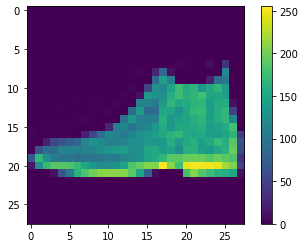

In [59]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(testX[0])
plt.colorbar()
plt.grid(False)
plt.show()